=== Training dengan SGD (Single Perceptron Linear) ===
Epoch   0 → Loss: 0.059585
Epoch  50 → Loss: 0.001771
Epoch 100 → Loss: 0.001528
Epoch 150 → Loss: 0.001603


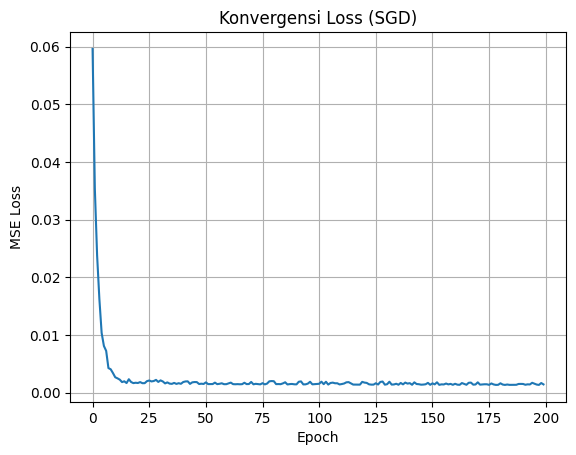


=== Prediksi Rumah Baru ===
Luas 90m², 3 kamar → Prediksi harga: 463 juta
Luas 150m², 4 kamar → Prediksi harga: 770 juta
Luas 200m², 5 kamar → Prediksi harga: 1026 juta


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================
# 1️⃣ Dataset: [luas_tanah(m²), jumlah_kamar, harga(juta)]
# =========================================
data = np.array([
    [60, 2, 300],
    [80, 3, 450],
    [100, 3, 500],
    [120, 4, 600],
    [140, 4, 750],
    [160, 5, 800],
    [180, 5, 950]
])

# Pisahkan fitur (X) dan target (y)
X = data[:, :2]   # kolom 0-1 → luas, kamar
y = data[:, 2]    # kolom 2 → harga

# =========================================
# 2️⃣ Normalisasi Data (Min-Max)
# =========================================
def min_max_normalize(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

X_norm = min_max_normalize(X)
y_min, y_max = y.min(), y.max()
y_norm = (y - y_min) / (y_max - y_min)

# =========================================
# 3️⃣ Inisialisasi Parameter Awal
# =========================================
np.random.seed(42)
w = np.random.randn(2)   # bobot untuk [luas, kamar]
b = np.random.randn()    # bias

# =========================================
# 4️⃣ Fungsi Prediksi dan Loss
# =========================================
def predict(X, w, b):
    """Prediksi linear: y_pred = X·w + b"""
    return np.dot(X, w) + b

def mse_loss(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred)**2)

# =========================================
# 5️⃣ Stochastic Gradient Descent (SGD)
# =========================================
def train_sgd(X, y, w, b, lr=0.1, epochs=200):
    n = len(X)
    losses = []

    for epoch in range(epochs):
        # Acak urutan data agar model tidak menghafal urutan
        indices = np.random.permutation(n)
        X, y = X[indices], y[indices]

        for i in range(n):
            # Ambil satu sampel (stochastic)
            x_i = X[i]
            y_i = y[i]

            # Feedforward
            y_pred = np.dot(x_i, w) + b
            error = y_pred - y_i

            # Hitung gradien (turunan loss terhadap w dan b)
            grad_w = 2 * x_i * error
            grad_b = 2 * error

            # Update parameter
            w -= lr * grad_w
            b -= lr * grad_b

        # Simpan loss tiap epoch
        y_pred_all = predict(X, w, b)
        loss = mse_loss(y, y_pred_all)
        losses.append(loss)

        # Tampilkan progress tiap 50 epoch
        if epoch % 50 == 0:
            print(f"Epoch {epoch:3d} → Loss: {loss:.6f}")

    return w, b, losses

# =========================================
# 6️⃣ Jalankan Training
# =========================================
print("=== Training dengan SGD (Single Perceptron Linear) ===")
w_trained, b_trained, losses = train_sgd(X_norm, y_norm, w, b)

# =========================================
# 7️⃣ Visualisasi Konvergensi
# =========================================
plt.plot(losses)
plt.title("Konvergensi Loss (SGD)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# =========================================
# 8️⃣ Prediksi Rumah Baru
# =========================================
def predict_new(luas, kamar, w, b, X):
    """Prediksi harga rumah baru"""
    # Normalisasi input baru agar sesuai dengan skala training
    luas_norm = (luas - X[:,0].min()) / (X[:,0].max() - X[:,0].min())
    kamar_norm = (kamar - X[:,1].min()) / (X[:,1].max() - X[:,1].min())

    # Prediksi (skala normalisasi)
    y_pred_norm = predict(np.array([luas_norm, kamar_norm]), w, b)

    # Denormalisasi hasil ke harga asli
    return y_pred_norm * (y_max - y_min) + y_min

print("\n=== Prediksi Rumah Baru ===")
for luas, kamar in [(90,3), (150,4), (200,5)]:
    harga = predict_new(luas, kamar, w_trained, b_trained, X)
    print(f"Luas {luas}m², {kamar} kamar → Prediksi harga: {harga:.0f} juta")


=== Training dengan Batch Gradient Descent (Matrix Version) ===
Epoch    0 → Loss: 0.118944, Theta: [ 0.46639573 -0.14846107  0.63483323]
Epoch  100 → Loss: 0.009654, Theta: [0.06608473 0.03640613 0.74002097]
Epoch  200 → Loss: 0.006614, Theta: [-0.00265678  0.12461218  0.76643975]
Epoch  300 → Loss: 0.006107, Theta: [-0.01902311  0.16863966  0.75230118]
Epoch  400 → Loss: 0.005784, Theta: [-0.02205894  0.20068247  0.72849683]
Epoch  500 → Loss: 0.005493, Theta: [-0.02172957  0.22898171  0.70288948]
Epoch  600 → Loss: 0.005221, Theta: [-0.02057753  0.25566354  0.67746437]
Epoch  700 → Loss: 0.004966, Theta: [-0.01925062  0.28129244  0.65270709]
Epoch  800 → Loss: 0.004728, Theta: [-0.01791305  0.30603357  0.62872117]
Epoch  900 → Loss: 0.004505, Theta: [-0.01660562  0.32994943  0.60551328]

Parameter akhir:
Bias (b): -0.015350
Bobot luas (w1): 0.352848
Bobot kamar (w2): 0.583287


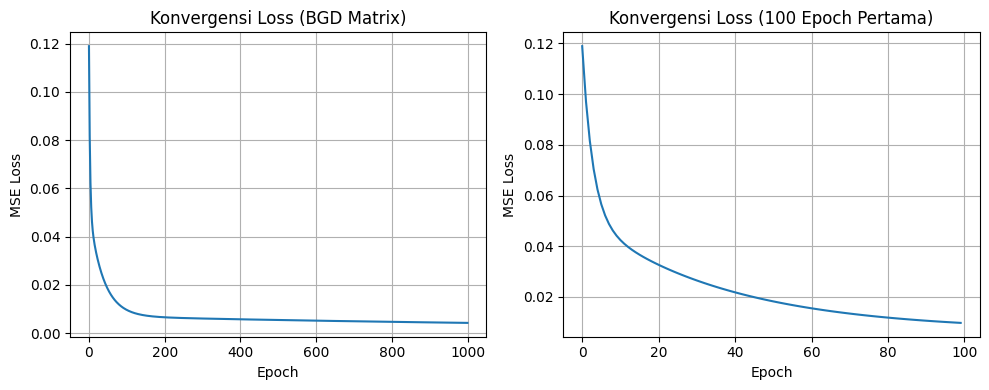


=== Prediksi Rumah Baru (BGD Matrix) ===
Luas 90m², 3 kamar → Prediksi harga: 474 juta
Luas 150m², 4 kamar → Prediksi harga: 715 juta
Luas 200m², 5 kamar → Prediksi harga: 937 juta

=== Evaluasi Model ===
Data Asli vs Prediksi:
Luas:  60m², Kamar: 2, Harga Asli: 300 juta, Prediksi: 290 juta
Luas:  80m², Kamar: 3, Harga Asli: 450 juta, Prediksi: 455 juta
Luas: 100m², Kamar: 3, Harga Asli: 500 juta, Prediksi: 493 juta
Luas: 120m², Kamar: 4, Harga Asli: 600 juta, Prediksi: 657 juta
Luas: 140m², Kamar: 4, Harga Asli: 750 juta, Prediksi: 696 juta
Luas: 160m², Kamar: 5, Harga Asli: 800 juta, Prediksi: 860 juta
Luas: 180m², Kamar: 5, Harga Asli: 950 juta, Prediksi: 899 juta

R-squared: 0.9582


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================
# 1️⃣ Dataset: [luas_tanah(m²), jumlah_kamar, harga(juta)]
# =========================================
data = np.array([
    [60, 2, 300],
    [80, 3, 450],
    [100, 3, 500],
    [120, 4, 600],
    [140, 4, 750],
    [160, 5, 800],
    [180, 5, 950]
])

# Pisahkan fitur (X) dan target (y)
X = data[:, :2]   # kolom 0-1 → luas, kamar
y = data[:, 2]    # kolom 2 → harga

# =========================================
# 2️⃣ Normalisasi Data (Min-Max)
# =========================================
def min_max_normalize(data):
    return (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

X_norm = min_max_normalize(X)
y_min, y_max = y.min(), y.max()
y_norm = (y - y_min) / (y_max - y_min)

# Tambahkan kolom bias (1) ke X untuk memudahkan operasi matrix
X_norm_with_bias = np.column_stack([np.ones(len(X_norm)), X_norm])

# =========================================
# 3️⃣ Inisialisasi Parameter Awal (dalam bentuk matrix)
# =========================================
np.random.seed(42)
# Sekarang theta = [bias, w1, w2] dalam satu vektor
theta = np.random.randn(3)  # [b, w_luas, w_kamar]

# =========================================
# 4️⃣ Fungsi Prediksi dan Loss (Matrix Version)
# =========================================
def predict_matrix(X, theta):
    """Prediksi linear: y_pred = X · theta (dalam bentuk matrix)"""
    return np.dot(X, theta)

def mse_loss(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred)**2)

# =========================================
# 5️⃣ Batch Gradient Descent (BGD) - Matrix Version
# =========================================
def train_bgd_matrix(X, y, theta, lr=0.1, epochs=1000):
    """
    Batch Gradient Descent menggunakan operasi matrix
    X: matrix fitur dengan kolom bias
    y: vektor target
    theta: parameter model [bias, w1, w2, ...]
    """
    m = len(y)  # jumlah sampel
    losses = []

    for epoch in range(epochs):
        # Feedforward (prediksi untuk semua data sekaligus)
        y_pred = predict_matrix(X, theta)
        
        # Hitung error untuk semua data
        errors = y_pred - y
        
        # Hitung gradien menggunakan operasi matrix
        # ∇J(θ) = (1/m) * X^T · (Xθ - y)
        gradients = (1/m) * np.dot(X.T, errors)
        
        # Update semua parameter sekaligus
        theta -= lr * gradients
        
        # Simpan loss
        loss = mse_loss(y, y_pred)
        losses.append(loss)
        
        # Tampilkan progress tiap 100 epoch
        if epoch % 100 == 0:
            print(f"Epoch {epoch:4d} → Loss: {loss:.6f}, Theta: {theta}")

    return theta, losses

# =========================================
# 6️⃣ Jalankan Training BGD Matrix
# =========================================
print("=== Training dengan Batch Gradient Descent (Matrix Version) ===")
theta_trained, losses = train_bgd_matrix(X_norm_with_bias, y_norm, theta, lr=0.1, epochs=1000)

print(f"\nParameter akhir:")
print(f"Bias (b): {theta_trained[0]:.6f}")
print(f"Bobot luas (w1): {theta_trained[1]:.6f}")
print(f"Bobot kamar (w2): {theta_trained[2]:.6f}")

# =========================================
# 7️⃣ Visualisasi Konvergensi
# =========================================
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Konvergensi Loss (BGD Matrix)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(losses[:100])  # Tampilkan 100 epoch pertama untuk melihat konvergensi awal
plt.title("Konvergensi Loss (100 Epoch Pertama)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================
# 8️⃣ Prediksi Rumah Baru (Matrix Version)
# =========================================
def predict_new_matrix(luas, kamar, theta, X_original):
    """Prediksi harga rumah baru menggunakan parameter matrix"""
    # Normalisasi input baru
    luas_min, luas_max = X_original[:, 0].min(), X_original[:, 0].max()
    kamar_min, kamar_max = X_original[:, 1].min(), X_original[:, 1].max()
    
    luas_norm = (luas - luas_min) / (luas_max - luas_min)
    kamar_norm = (kamar - kamar_min) / (kamar_max - kamar_min)
    
    # Buat vektor fitur dengan bias
    x_new = np.array([1, luas_norm, kamar_norm])
    
    # Prediksi (skala normalisasi)
    y_pred_norm = predict_matrix(x_new, theta)
    
    # Denormalisasi hasil ke harga asli
    return y_pred_norm * (y_max - y_min) + y_min

print("\n=== Prediksi Rumah Baru (BGD Matrix) ===")
for luas, kamar in [(90, 3), (150, 4), (200, 5)]:
    harga = predict_new_matrix(luas, kamar, theta_trained, X)
    print(f"Luas {luas}m², {kamar} kamar → Prediksi harga: {harga:.0f} juta")

# =========================================
# 9️⃣ Evaluasi Model
# =========================================
# Prediksi untuk data training
y_pred_train_norm = predict_matrix(X_norm_with_bias, theta_trained)
y_pred_train = y_pred_train_norm * (y_max - y_min) + y_min

print(f"\n=== Evaluasi Model ===")
print("Data Asli vs Prediksi:")
for i in range(len(data)):
    print(f"Luas: {data[i,0]:3d}m², Kamar: {data[i,1]}, Harga Asli: {data[i,2]:3d} juta, Prediksi: {y_pred_train[i]:3.0f} juta")

# Hitung R-squared
ss_res = np.sum((y - y_pred_train) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR-squared: {r_squared:.4f}")

In [ ]:
# Perbedaan Utama BGD Matrix vs SGD:
# 1. Struktur Parameter:
# SGD: w dan b terpisah

# BGD Matrix: theta = [b, w1, w2] dalam satu vektor

# 2. Perhitungan Gradien:
# SGD: Hitung gradien per sampel

# python
# grad_w = 2 * x_i * error
# grad_b = 2 * error
# BGD Matrix: Hitung gradien untuk semua data sekaligus

# python
# gradients = (1/m) * np.dot(X.T, errors)
# 3. Update Parameter:
# SGD: Update setiap melihat satu sampel

# BGD Matrix: Update sekali per epoch menggunakan semua data

# 4. Keuntungan BGD Matrix:
# Lebih efisien secara komputasi

# Konvergensi lebih smooth

# Mudah diimplementasikan dengan operasi matrix NumPy

# Scalable untuk dataset yang lebih besar

# Hasil BGD Matrix biasanya lebih stabil dan konvergen lebih halus dibandingkan SGD!

In [ ]:
# 1. Inisialisasi θ secara random
# 2. Untuk epoch = 1 sampai M:
#    a. Hitung prediksi: ŷ = Xθ
#    b. Hitung error: e = ŷ - y
#    c. Hitung gradien: ∇J(θ) = (1/m) * Xᵀe
#    d. Update parameter: θ = θ - α∇J(θ)
#    e. Hitung loss: J(θ) = (1/2m) * eᵀe
# 3. Return θ final

for epoch in range(epochs):
    # Forward pass
    y_pred = X @ theta
    
    # Compute error
    errors = y_pred - y
    
    # Compute gradient
    gradient = (1/m) * X.T @ errors
    
    # Update parameters
    theta -= learning_rate * gradient
    
    # Compute loss
    loss = (1/(2*m)) * errors.T @ errors

In [ ]:
# pip install scikit-learn

=== Dataset Rumah (4 Fitur) ===
Format: [luas, kamar, jarak(km), usia(tahun), harga(juta)]
[[  60    2    5    2  300]
 [  80    3    8    5  450]
 [ 100    3   12    8  500]
 [ 120    4   15   10  600]
 [ 140    4    3    3  750]
 [ 160    5    7    7  800]
 [ 180    5   10   12  950]
 [ 200    4    2    1 1100]
 [  90    3    6    4  520]
 [ 130    4    9    6  680]]

Parameter awal: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]

=== Training Model Rumah (4 Fitur) ===
Epoch    0 → Loss: 1.102138
Epoch  200 → Loss: 0.011695
Epoch  400 → Loss: 0.009128
Epoch  600 → Loss: 0.007642
Epoch  800 → Loss: 0.006431

Parameter akhir:
Bias (θ₀): -0.034749
Luas (θ₁): 0.676866
Kamar (θ₂): 0.477894
Jarak (θ₃): 0.337406
Usia (θ₄): -0.566600

=== Prediksi Rumah Baru ===
Luas: 110m², Kamar: 3, Jarak: 10km, Usia:  5tahun → Prediksi:    594 juta
Luas: 150m², Kamar: 4, Jarak:  4km, Usia:  2tahun → Prediksi:    875 juta
Luas: 170m², Kamar: 4, Jarak:  8km, Usia:  8tahun → Prediksi:    789 j

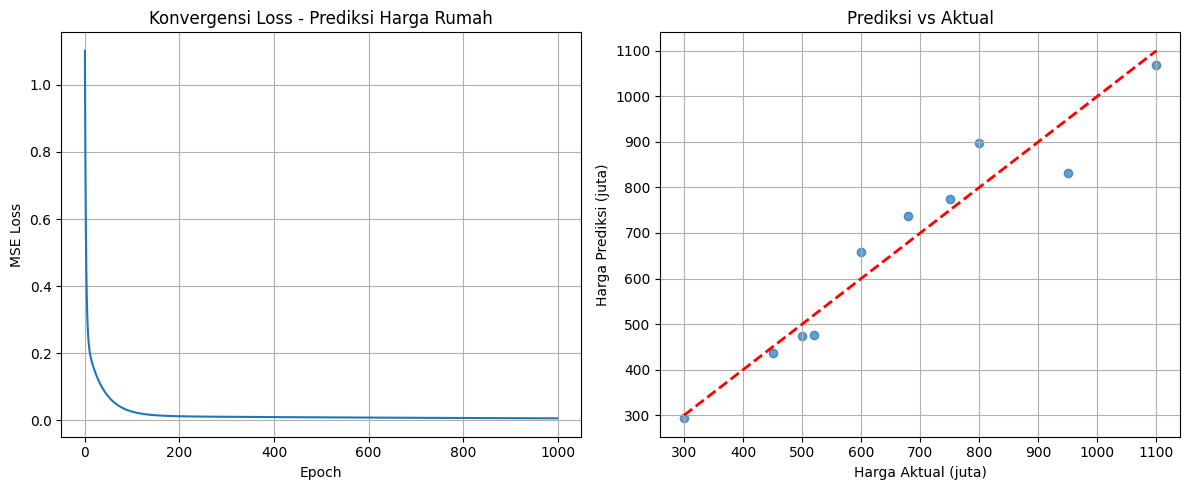


=== Evaluasi Model Rumah ===
R-squared: 0.9341
MSE: 3481.95
RMSE: 59.01 juta


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================
# 1️⃣ Dataset: [luas_tanah, jumlah_kamar, jarak_ke_kota, usia_rumah, harga]
# =========================================
data_rumah = np.array([
    [60, 2, 5, 2, 300],
    [80, 3, 8, 5, 450],
    [100, 3, 12, 8, 500],
    [120, 4, 15, 10, 600],
    [140, 4, 3, 3, 750],
    [160, 5, 7, 7, 800],
    [180, 5, 10, 12, 950],
    [200, 4, 2, 1, 1100],
    [90, 3, 6, 4, 520],
    [130, 4, 9, 6, 680]
])

# Pisahkan fitur (X) dan target (y)
X_rumah = data_rumah[:, :4]   # 4 fitur: luas, kamar, jarak, usia
y_rumah = data_rumah[:, 4]    # harga

print("=== Dataset Rumah (4 Fitur) ===")
print("Format: [luas, kamar, jarak(km), usia(tahun), harga(juta)]")
print(data_rumah)

# =========================================
# 2️⃣ Normalisasi Data
# =========================================
def min_max_normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    return (data - min_vals) / (max_vals - min_vals), min_vals, max_vals

X_norm, X_min, X_max = min_max_normalize(X_rumah)
y_min, y_max = y_rumah.min(), y_rumah.max()
y_norm = (y_rumah - y_min) / (y_max - y_min)

# Tambahkan kolom bias
X_norm_with_bias = np.column_stack([np.ones(len(X_norm)), X_norm])

# =========================================
# 3️⃣ Inisialisasi Parameter
# =========================================
np.random.seed(42)
theta_rumah = np.random.randn(5)  # [bias, w_luas, w_kamar, w_jarak, w_usia]

print(f"\nParameter awal: {theta_rumah}")

# =========================================
# 4️⃣ Fungsi BGD Matrix
# =========================================
def bgd_matrix(X, y, theta, lr=0.1, epochs=1000):
    m = len(y)
    losses = []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred = X @ theta
        
        # Compute gradients
        errors = y_pred - y
        gradients = (1/m) * X.T @ errors
        
        # Update parameters
        theta -= lr * gradients
        
        # Compute loss
        loss = np.mean(errors ** 2)
        losses.append(loss)
        
        if epoch % 200 == 0:
            print(f"Epoch {epoch:4d} → Loss: {loss:.6f}")
    
    return theta, losses

# =========================================
# 5️⃣ Training Model Rumah
# =========================================
print("\n=== Training Model Rumah (4 Fitur) ===")
theta_trained_rumah, losses_rumah = bgd_matrix(X_norm_with_bias, y_norm, theta_rumah, lr=0.1, epochs=1000)

print(f"\nParameter akhir:")
print(f"Bias (θ₀): {theta_trained_rumah[0]:.6f}")
print(f"Luas (θ₁): {theta_trained_rumah[1]:.6f}")
print(f"Kamar (θ₂): {theta_trained_rumah[2]:.6f}")
print(f"Jarak (θ₃): {theta_trained_rumah[3]:.6f}")
print(f"Usia (θ₄): {theta_trained_rumah[4]:.6f}")

# =========================================
# 6️⃣ Prediksi Rumah Baru
# =========================================
def predict_rumah(luas, kamar, jarak, usia, theta, X_min, X_max, y_min, y_max):
    # Normalisasi input
    features = np.array([luas, kamar, jarak, usia])
    features_norm = (features - X_min) / (X_max - X_min)
    
    # Tambahkan bias
    x_new = np.insert(features_norm, 0, 1)
    
    # Prediksi
    y_pred_norm = x_new @ theta
    y_pred = y_pred_norm * (y_max - y_min) + y_min
    
    return y_pred

print("\n=== Prediksi Rumah Baru ===")
test_cases = [
    (110, 3, 10, 5),
    (150, 4, 4, 2),
    (170, 4, 8, 8)
]

for luas, kamar, jarak, usia in test_cases:
    harga_pred = predict_rumah(luas, kamar, jarak, usia, theta_trained_rumah, X_min, X_max, y_min, y_max)
    print(f"Luas: {luas:3d}m², Kamar: {kamar}, Jarak: {jarak:2d}km, Usia: {usia:2d}tahun → Prediksi: {harga_pred:6.0f} juta")

# =========================================
# 7️⃣ Visualisasi
# =========================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_rumah)
plt.title("Konvergensi Loss - Prediksi Harga Rumah")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

# Plot prediksi vs aktual
plt.subplot(1, 2, 2)
y_pred_all = X_norm_with_bias @ theta_trained_rumah
y_pred_denorm = y_pred_all * (y_max - y_min) + y_min
plt.scatter(y_rumah, y_pred_denorm, alpha=0.7)
plt.plot([y_rumah.min(), y_rumah.max()], [y_rumah.min(), y_rumah.max()], 'r--', lw=2)
plt.xlabel("Harga Aktual (juta)")
plt.ylabel("Harga Prediksi (juta)")
plt.title("Prediksi vs Aktual")
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================
# 8️⃣ Evaluasi Model
# =========================================
from sklearn.metrics import r2_score

y_pred_final = X_norm_with_bias @ theta_trained_rumah
y_pred_denorm_final = y_pred_final * (y_max - y_min) + y_min

r2 = r2_score(y_rumah, y_pred_denorm_final)
mse = np.mean((y_rumah - y_pred_denorm_final) ** 2)

print(f"\n=== Evaluasi Model Rumah ===")
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f} juta")

=== Dataset Mahasiswa (4 Fitur) ===
Format: [jam_belajar, tugas_selesai, kehadiran(%), uts, nilai_akhir]
[[ 15   8  85  70  75]
 [ 20   9  90  75  82]
 [ 25  10  95  85  90]
 [ 18   7  80  65  72]
 [ 30  10 100  90  95]
 [ 12   6  75  60  68]
 [ 22   8  88  78  80]
 [ 28   9  92  82  88]
 [ 16   7  82  68  74]
 [ 24   9  89  80  85]
 [ 19   8  86  72  78]
 [ 26  10  94  87  92]]

Parameter awal: [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]

=== Training Model Nilai Mahasiswa (4 Fitur) ===
Epoch    0 → Loss: 4.253962
Epoch  200 → Loss: 0.009822
Epoch  400 → Loss: 0.007331
Epoch  600 → Loss: 0.005864

Parameter akhir:
Bias (θ₀): -0.059610
Jam Belajar (θ₁): 0.810329
Tugas (θ₂): 0.904126
Kehadiran (θ₃): -0.740934
UTS (θ₄): -0.027397

=== Prediksi Nilai Mahasiswa Baru ===
Jam: 20, Tugas: 8, Kehadiran:  87%, UTS: 76 → Prediksi:  78.3
Jam: 25, Tugas: 9, Kehadiran:  91%, UTS: 83 → Prediksi:  87.1
Jam: 17, Tugas: 7, Kehadiran:  79%, UTS: 67 → Prediksi:  75.2
Jam: 28, Tugas: 10,

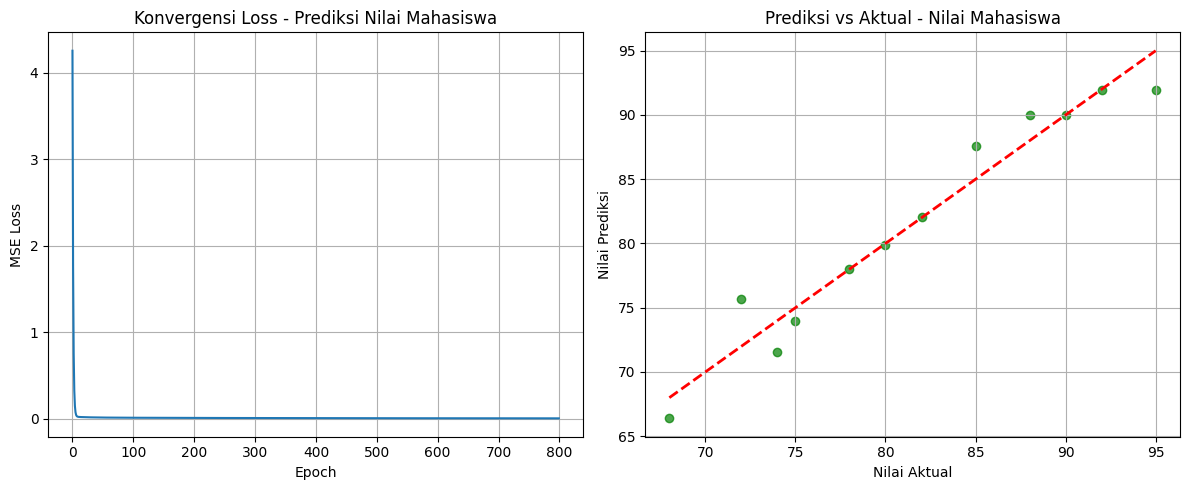


=== Evaluasi Model Mahasiswa ===
R-squared: 0.9465
MSE: 3.59
RMSE: 1.90

=== Analisis Pengaruh Fitur ===
Jam Belajar    : +0.810329 ( 32.6%)
Tugas Selesai  : +0.904126 ( 36.4%)
Kehadiran      : -0.740934 ( 29.8%)
UTS            : -0.027397 (  1.1%)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# =========================================
# 1️⃣ Dataset: [jam_belajar, tugas_selesai, kehadiran, uts, nilai_akhir]
# =========================================
data_mahasiswa = np.array([
    [15, 8, 85, 70, 75],
    [20, 9, 90, 75, 82],
    [25, 10, 95, 85, 90],
    [18, 7, 80, 65, 72],
    [30, 10, 100, 90, 95],
    [12, 6, 75, 60, 68],
    [22, 8, 88, 78, 80],
    [28, 9, 92, 82, 88],
    [16, 7, 82, 68, 74],
    [24, 9, 89, 80, 85],
    [19, 8, 86, 72, 78],
    [26, 10, 94, 87, 92]
])

# Pisahkan fitur (X) dan target (y)
X_mhs = data_mahasiswa[:, :4]   # 4 fitur: jam_belajar, tugas, kehadiran, uts
y_mhs = data_mahasiswa[:, 4]    # nilai_akhir

print("=== Dataset Mahasiswa (4 Fitur) ===")
print("Format: [jam_belajar, tugas_selesai, kehadiran(%), uts, nilai_akhir]")
print(data_mahasiswa)

# =========================================
# 2️⃣ Normalisasi Data
# =========================================
X_norm_mhs, X_min_mhs, X_max_mhs = min_max_normalize(X_mhs)
y_min_mhs, y_max_mhs = y_mhs.min(), y_mhs.max()
y_norm_mhs = (y_mhs - y_min_mhs) / (y_max_mhs - y_min_mhs)

# Tambahkan kolom bias
X_norm_with_bias_mhs = np.column_stack([np.ones(len(X_norm_mhs)), X_norm_mhs])

# =========================================
# 3️⃣ Inisialisasi Parameter
# =========================================
np.random.seed(123)
theta_mhs = np.random.randn(5)  # [bias, w_jam, w_tugas, w_kehadiran, w_uts]

print(f"\nParameter awal: {theta_mhs}")

# =========================================
# 4️⃣ Training Model Mahasiswa
# =========================================
print("\n=== Training Model Nilai Mahasiswa (4 Fitur) ===")
theta_trained_mhs, losses_mhs = bgd_matrix(X_norm_with_bias_mhs, y_norm_mhs, theta_mhs, lr=0.15, epochs=800)

print(f"\nParameter akhir:")
print(f"Bias (θ₀): {theta_trained_mhs[0]:.6f}")
print(f"Jam Belajar (θ₁): {theta_trained_mhs[1]:.6f}")
print(f"Tugas (θ₂): {theta_trained_mhs[2]:.6f}")
print(f"Kehadiran (θ₃): {theta_trained_mhs[3]:.6f}")
print(f"UTS (θ₄): {theta_trained_mhs[4]:.6f}")

# =========================================
# 5️⃣ Prediksi Nilai Mahasiswa Baru
# =========================================
def predict_mahasiswa(jam, tugas, kehadiran, uts, theta, X_min, X_max, y_min, y_max):
    # Normalisasi input
    features = np.array([jam, tugas, kehadiran, uts])
    features_norm = (features - X_min) / (X_max - X_min)
    
    # Tambahkan bias
    x_new = np.insert(features_norm, 0, 1)
    
    # Prediksi
    y_pred_norm = x_new @ theta
    y_pred = y_pred_norm * (y_max - y_min) + y_min
    
    return y_pred

print("\n=== Prediksi Nilai Mahasiswa Baru ===")
test_cases_mhs = [
    (20, 8, 87, 76),
    (25, 9, 91, 83),
    (17, 7, 79, 67),
    (28, 10, 96, 89)
]

for jam, tugas, kehadiran, uts in test_cases_mhs:
    nilai_pred = predict_mahasiswa(jam, tugas, kehadiran, uts, theta_trained_mhs, X_min_mhs, X_max_mhs, y_min_mhs, y_max_mhs)
    print(f"Jam: {jam:2d}, Tugas: {tugas}, Kehadiran: {kehadiran:3d}%, UTS: {uts} → Prediksi: {nilai_pred:5.1f}")

# =========================================
# 6️⃣ Visualisasi Mahasiswa
# =========================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_mhs)
plt.title("Konvergensi Loss - Prediksi Nilai Mahasiswa")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

# Plot prediksi vs aktual
plt.subplot(1, 2, 2)
y_pred_all_mhs = X_norm_with_bias_mhs @ theta_trained_mhs
y_pred_denorm_mhs = y_pred_all_mhs * (y_max_mhs - y_min_mhs) + y_min_mhs
plt.scatter(y_mhs, y_pred_denorm_mhs, alpha=0.7, color='green')
plt.plot([y_mhs.min(), y_mhs.max()], [y_mhs.min(), y_mhs.max()], 'r--', lw=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Aktual - Nilai Mahasiswa")
plt.grid(True)

plt.tight_layout()
plt.show()

# =========================================
# 7️⃣ Evaluasi Model Mahasiswa
# =========================================
y_pred_final_mhs = X_norm_with_bias_mhs @ theta_trained_mhs
y_pred_denorm_final_mhs = y_pred_final_mhs * (y_max_mhs - y_min_mhs) + y_min_mhs

r2_mhs = r2_score(y_mhs, y_pred_denorm_final_mhs)
mse_mhs = np.mean((y_mhs - y_pred_denorm_final_mhs) ** 2)

print(f"\n=== Evaluasi Model Mahasiswa ===")
print(f"R-squared: {r2_mhs:.4f}")
print(f"MSE: {mse_mhs:.2f}")
print(f"RMSE: {np.sqrt(mse_mhs):.2f}")

# =========================================
# 8️⃣ Analisis Pengaruh Fitur
# =========================================
print(f"\n=== Analisis Pengaruh Fitur ===")
feature_names = ['Jam Belajar', 'Tugas Selesai', 'Kehadiran', 'UTS']
for i, (name, weight) in enumerate(zip(feature_names, theta_trained_mhs[1:])):
    print(f"{name:15}: {weight:+.6f} ({abs(weight)/np.sum(np.abs(theta_trained_mhs[1:]))*100:5.1f}%)")